In [14]:
import pandas as pd

df = pd.read_csv("data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
df['name'].sample(10)

33050      Cool Private Room in Dreamy Bedstuy Apartment
25339       modern duplex in classic brooklyn brownstone
12817                         Heart of Williamsburg 1 BD
1036                   Lux One-bed Central Park View UWS
16575    Gorgeous exclusive Room with all amenities, gym
16304           Beautiful Private Room Near Hudson River
23948                      Spacious Modern Brooklyn Apt!
2816                                         COZY STUDIO
9392                   Chic Studio Apartment in Bed Stuy
48748                 US Open special 2-bed luxury condo
Name: name, dtype: object

In [17]:
all_words = {}
i = 0
for name in df['name']:
    words = str(name).split(' ')
    for word in words:
        word = word.lower()
        if word in all_words:
            all_words[word] += 1
        else:
            all_words[word] = 1

In [18]:
top_words = {}
i = 0
for word in sorted(all_words.keys(), key = lambda x: all_words[x], reverse = True):
    if i<25:
        if word not in ['in', 'and', '1', '2', '&', 'with', 'to', 'of', 'the', '', '-', 'a', 'from']:
            top_words[word] = all_words[word]
            i += 1
    elif i >=25:
        break
        
for k, v in top_words.items():
    print(f'{k}: {v}')


room: 9381
bedroom: 7228
private: 6982
apartment: 6108
cozy: 4632
studio: 3772
brooklyn: 3625
apt: 3571
spacious: 3386
east: 2967
manhattan: 2853
park: 2629
sunny: 2535
beautiful: 2319
williamsburg: 2292
near: 2286
village: 2053
heart: 2044
large: 1881
loft: 1820
nyc: 1789
central: 1713
modern: 1647
home: 1617
luxury: 1613


In [19]:
neigh = df.groupby('neighbourhood_group')['price'].mean().reset_index()
neigh

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


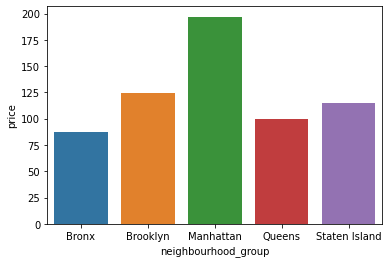

In [20]:
import seaborn as sns
%matplotlib inline

sns.barplot(x = 'neighbourhood_group', y = 'price', data = neigh)

In [21]:
df.room_type.unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:
len(df[df.number_of_reviews==0])

10052

In [23]:
len(df)

48895

In [25]:
len(df.host_id.unique())

37457